In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Question A1: Please perform exploratory data analysis on the dataset to understand the following.
• Data types of attributes
• Missing values if any and how to perform imputations
• Class balance nature of data
• Attribute correlation study with correlation matrix and heatmap plot of the matrix
• Matrix rank study to find the dimensionality of data cloud
• Data range and normalization aspects

In [28]:
# Load Dataset
def load_dataset(file_path):
    """Loads the dataset from a CSV file and removes non-numeric columns."""
    df = pd.read_csv(file_path)
    # Drop non-numeric columns
    if 'Filename' in df.columns:
        df.drop(columns=['Filename'], inplace=True)
    return df

In [29]:
# Exploratory Data Analysis
def perform_eda(df):
    """Performs EDA including missing values, correlation, and class distribution."""
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nClass Distribution:")
    if 'Class Label' in df.columns:
        print(df['Class Label'].value_counts())
    else:
        print("Class Label column not found!")

    # Correlation Matrix
    plt.figure(figsize=(10,8))
    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # Matrix Rank Study
    X = numeric_df.drop(columns=['Class Label'], errors='ignore')
    y = df['Class Label']
    matrix_rank = np.linalg.matrix_rank(X)
    print(f"\nMatrix Rank: {matrix_rank}")

    # Data Range & Normalization
    print("\nFeature Range before Normalization:")
    print(X.describe())

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("\nFeature Range after Normalization:")
    print(pd.DataFrame(X_scaled).describe())

    return X_scaled, y

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 201 entries, Class Label to f199
dtypes: float64(174), int64(27)
memory usage: 5.0 MB
None

Missing Values:
Class Label    0
f0             0
f1             0
f2             0
f3             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 201, dtype: int64

Class Distribution:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


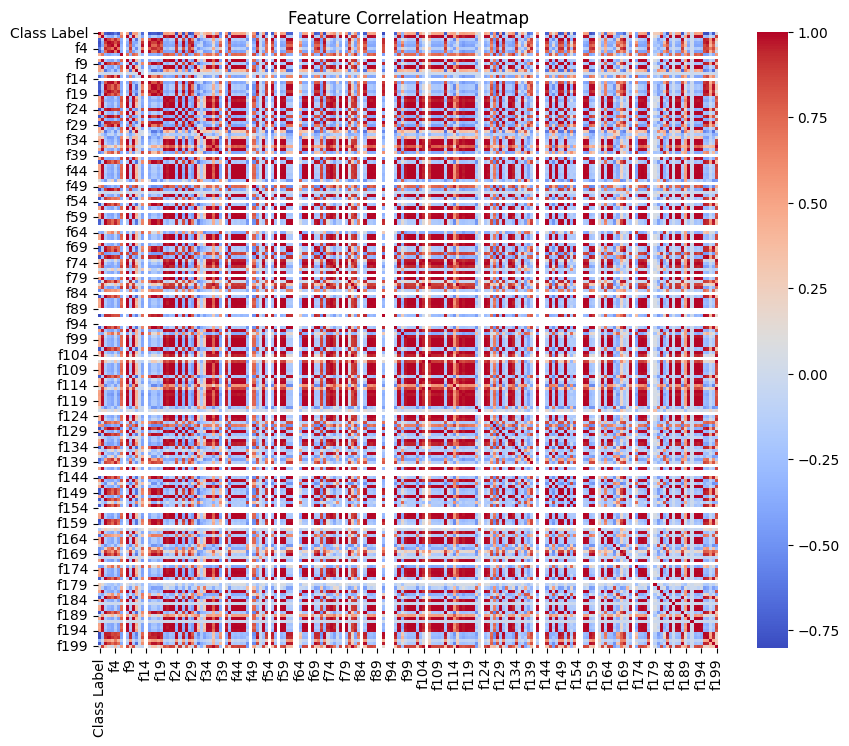


Matrix Rank: 174

Feature Range before Normalization:
                f0           f1           f2           f3           f4  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean     17.516938    57.919104   112.822180   170.829473    17.606476   
std      54.948034    93.672074    96.561850   124.512873    35.626627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    46.988506    85.638191     0.000000   
50%       0.000000     0.000000    93.278381   160.636246     0.000000   
75%       0.000000   117.704697   159.855179   248.145508    12.160916   
max     781.789490   459.207794   536.879639   760.753845   202.598496   

                f5           f6      f7            f8           f9  ...  \
count  3253.000000  3253.000000  3253.0   3253.000000  3253.000000  ...   
mean    141.614480    11.035532     0.0    214.312125    32.698847  ...   
std      99.128478    20.554964     0.0    738.811309

In [30]:
# Main Execution Block
def main():
    file_path = "/content/drive/MyDrive/Custom_CNN_Features.csv"  # Update path as needed
    df = load_dataset(file_path)
    perform_eda(df)

if __name__ == "__main__":
    main()

Question A2. Split the set into train & test sets with 75:25 split. Use various classifiers (kNN, Decision Tree,
Support Vector Machines, Random Forest, Naïve-Bayes etc.) for classification of the dataset. Study
the results of classification with accuracy, Precision, Recall, F1-Score & AUROC metrics.

In [31]:
# Train-Test Split
def split_data(X, y, test_size=0.25):
    """Splits the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [45]:
# Model Training & Evaluation
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    """Trains multiple models and evaluates their performance."""
    results = {}
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_time

        # Measure classification time
        start_time = time.time()
        y_train_pred = model.predict(X_train)
        train_classification_time = time.time() - start_time

        start_time = time.time()
        y_test_pred = model.predict(X_test)
        test_classification_time = time.time() - start_time

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_report = classification_report(y_train, y_train_pred, output_dict=True)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)

        auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr') if hasattr(model, 'predict_proba') else None
        auc_score_test = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, 'predict_proba') else None

        results[name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'train_precision': train_report['weighted avg']['precision'],
            'test_precision': test_report['weighted avg']['precision'],
            'train_recall': train_report['weighted avg']['recall'],
            'test_recall': test_report['weighted avg']['recall'],
            'train_f1-score': train_report['weighted avg']['f1-score'],
            'test_f1-score': test_report['weighted avg']['f1-score'],
            'train_roc_auc': auc_score_train,
            'test_roc_auc': auc_score_test,
            'train_time': train_time,
            'train_classification_time': train_classification_time,
            'test_classification_time': test_classification_time
        }
    return results

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 201 entries, Class Label to f199
dtypes: float64(174), int64(27)
memory usage: 5.0 MB
None

Missing Values:
Class Label    0
f0             0
f1             0
f2             0
f3             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 201, dtype: int64

Class Distribution:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


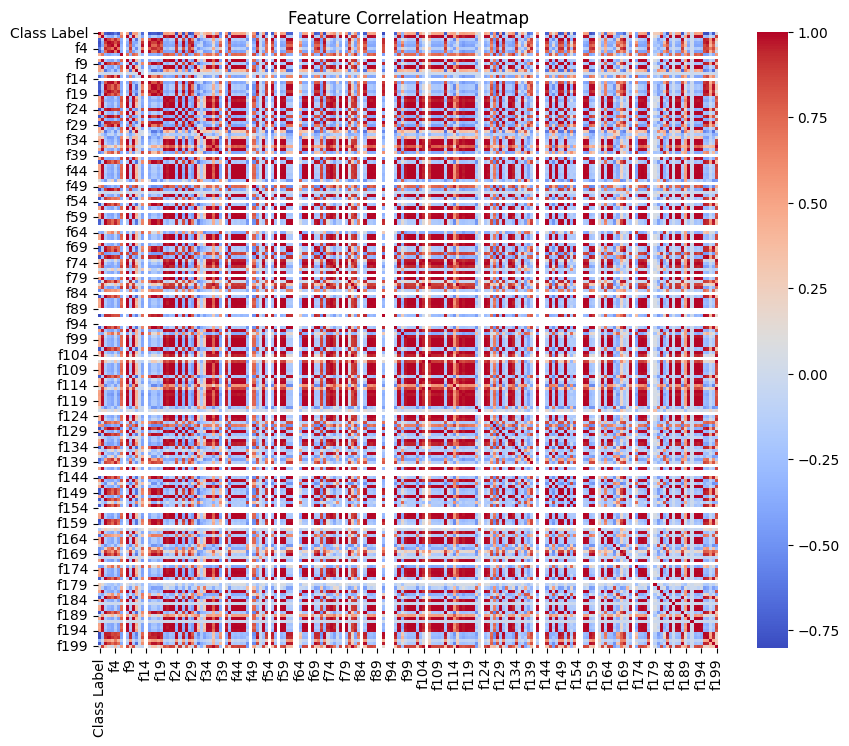


Matrix Rank: 174

Feature Range before Normalization:
                f0           f1           f2           f3           f4  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean     17.516938    57.919104   112.822180   170.829473    17.606476   
std      54.948034    93.672074    96.561850   124.512873    35.626627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    46.988506    85.638191     0.000000   
50%       0.000000     0.000000    93.278381   160.636246     0.000000   
75%       0.000000   117.704697   159.855179   248.145508    12.160916   
max     781.789490   459.207794   536.879639   760.753845   202.598496   

                f5           f6      f7            f8           f9  ...  \
count  3253.000000  3253.000000  3253.0   3253.000000  3253.000000  ...   
mean    141.614480    11.035532     0.0    214.312125    32.698847  ...   
std      99.128478    20.554964     0.0    738.811309

In [46]:
# Main Execution Block
def main():
    file_path = "/content/drive/MyDrive/Custom_CNN_Features.csv"  # Update path as needed
    df = load_dataset(file_path)
    X, y = perform_eda(df)
    X_train, X_test, y_train, y_test = split_data(X, y)

    models = {
        'kNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Random Forest': RandomForestClassifier(),
        'Naïve Bayes': GaussianNB()
    }

    results = train_and_evaluate(models, X_train, X_test, y_train, y_test)
    results_df = pd.DataFrame(results).T
    print(results_df)
    return results_df

if __name__ == "__main__":
    main()

Question A3. Check if the models have underfit, regular fit or overfit from the trainset and test set metrics.

From above metrics, we can observe that:

*   Good Fit: kNN, SVM, Naïve Bayes → Train and test accuracy are close.
*   Overfitting Detected: Decision Tree & Random Forest → 100% train accuracy, lower test accuracy.
*   No Underfitting Detected (No models have low train & test accuracy).

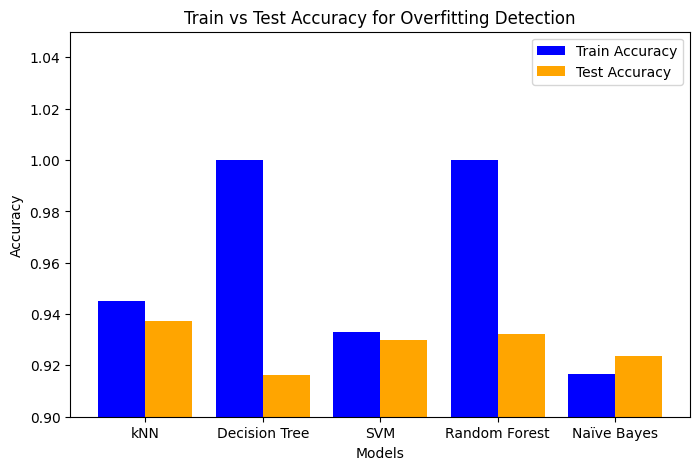

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['kNN', 'Decision Tree', 'SVM', 'Random Forest', 'Naïve Bayes']

# Accuracy values
train_accuracy = [0.9450, 1.0000, 0.9331, 1.0000, 0.9167]
test_accuracy = [0.9373, 0.9164, 0.9299, 0.9324, 0.9238]

x = np.arange(len(models))  # Model positions

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, train_accuracy, 0.4, label="Train Accuracy", color="blue")
plt.bar(x + 0.2, test_accuracy, 0.4, label="Test Accuracy", color="orange")

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Overfitting Detection")
plt.xticks(x, models)
plt.legend()
plt.ylim(0.9, 1.05)  # Zoom into accuracy range

plt.show()

Question A4. Check the timings of training and classification by each model.

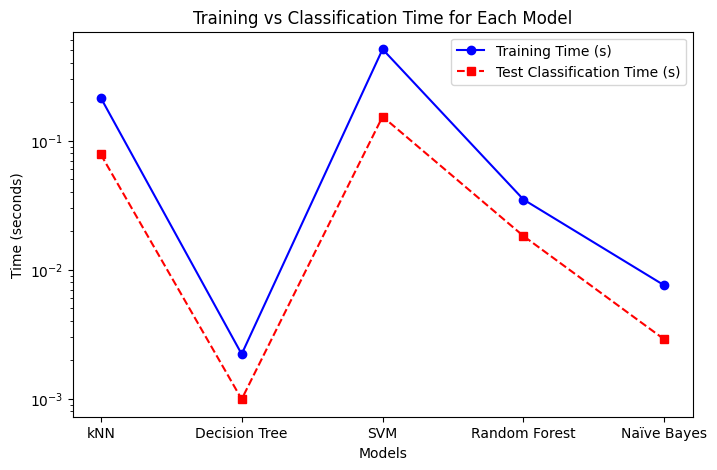

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['kNN', 'Decision Tree', 'SVM', 'Random Forest', 'Naïve Bayes']

# Replace these with actual recorded times from your results
train_times = [0.215051, 0.002213, 0.511465, 0.034931, 0.007542]  # Training times
test_classification_times = [0.078244, 0.000989, 0.153630, 0.018206, 0.002874]  # Test classification times

# Create a line graph
plt.figure(figsize=(8, 5))
plt.plot(models, train_times, marker='o', linestyle='-', color='b', label="Training Time (s)")
plt.plot(models, test_classification_times, marker='s', linestyle='--', color='r', label="Test Classification Time (s)")

# Labels and title
plt.xlabel("Models")
plt.ylabel("Time (seconds)")
plt.title("Training vs Classification Time for Each Model")
plt.legend()
plt.yscale("log")  # Log scale to visualize time differences more clearly

# Show the graph
plt.show()